## Autoevaluación 5


### BackPropagation

#### Pregunta 1

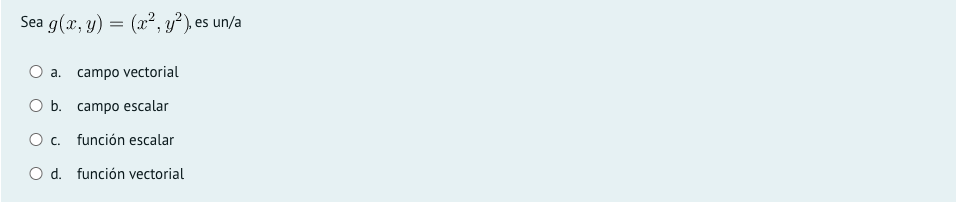

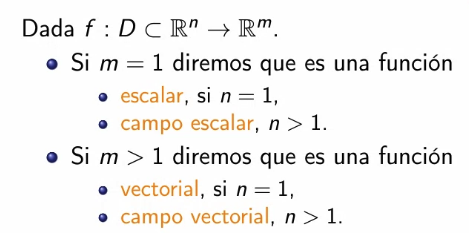

$g(x, y) = (x^2, y^2)$

Esto significa que a cada punto del plano (x, y) le asigna un vector con dos componentes. Por lo tanto, es un **campo vectorial**.

#### Pregunta 2

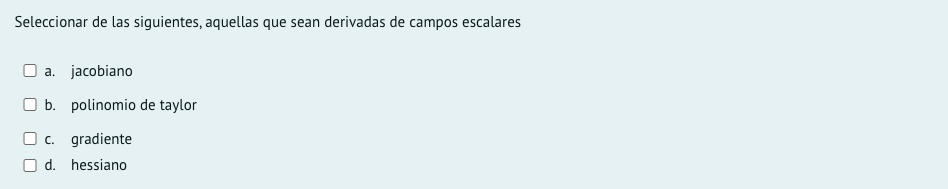

- ❌ a. jacobiano
    - El jacobiano se asocia a funciones vectoriales, no escalares.
    - Es una matriz que contiene derivadas de una función vectorial.
- ❌ b. polinomio de Taylor
    - Es una aproximación, no una derivada. Puede incluir derivadas, pero no es una derivada en sí misma.
- ✅ c. gradiente
    - El gradiente es la derivada de una función escalar.
    - Si f(x, y) es un campo escalar, entonces su gradiente es:
$\nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)$
- ✅ d. hessiano
    - El hessiano es la matriz de segundas derivadas de un campo escalar.
    - También proviene de una función escalar f, y describe su curvatura.

#### Pregunta 3

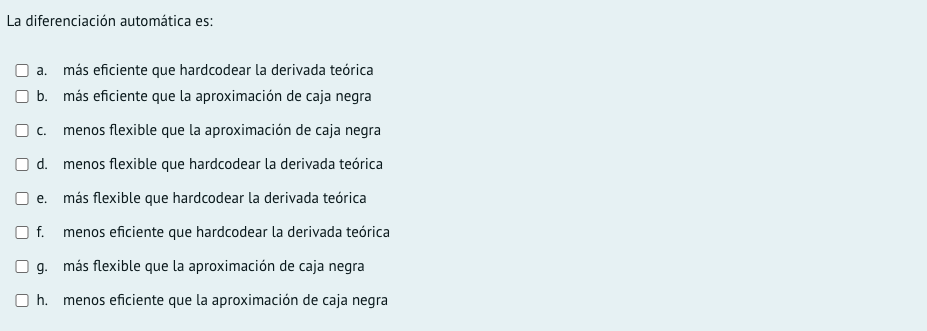

- ❌ a. más eficiente que hardcodear la derivada teórica
    - Hardcodear bien suele ser más rápido que diferenciación automática (AD).
- ✅ b. más eficiente que la aproximación de caja negra
    - AD es más rápida y precisa que usar diferencias finitas (caja negra).
- ✅ c. menos flexible que la aproximación de caja negra
- ❌ d. menos flexible que hardcodear la derivada teórica
    - AD es más flexible porque no requiere escribir derivadas manualmente.
- ✅ e. más flexible que hardcodear la derivada teórica
    - No necesitás deducir ni escribir derivadas, AD lo hace por vos.
- ✅ f. menos eficiente que hardcodear la derivada teórica
    - Sí, una derivada hardcodeada optimizada es más rápida que AD.
- ❌ g. más flexible que la aproximación de caja negra
- ❌ h. menos eficiente que la aproximación de caja negra
    - AD es más eficiente y precisa que una aproximación numérica.

#### Pregunta 4

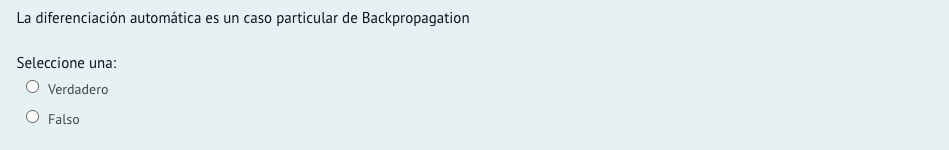

❌ **Falso**

 Backpropagation es un caso particular de diferenciación automática.

#### Pregunta 5

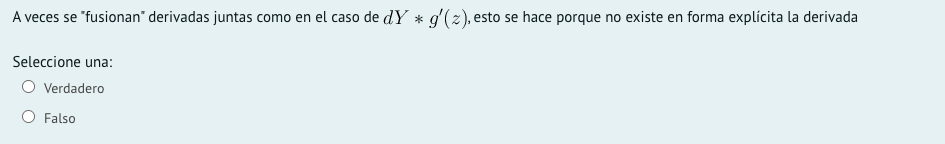

❌ **Falso**

- La expresión $dY \ast g{\prime}(z)$ no se hace porque no exista la derivada, sino porque es parte del proceso natural en backpropagation.
- En backprop, sí se conoce la derivada explícita de $g(z)$, pero se multiplican derivadas en cadena según la regla de la cadena.

#### Pregunta 6

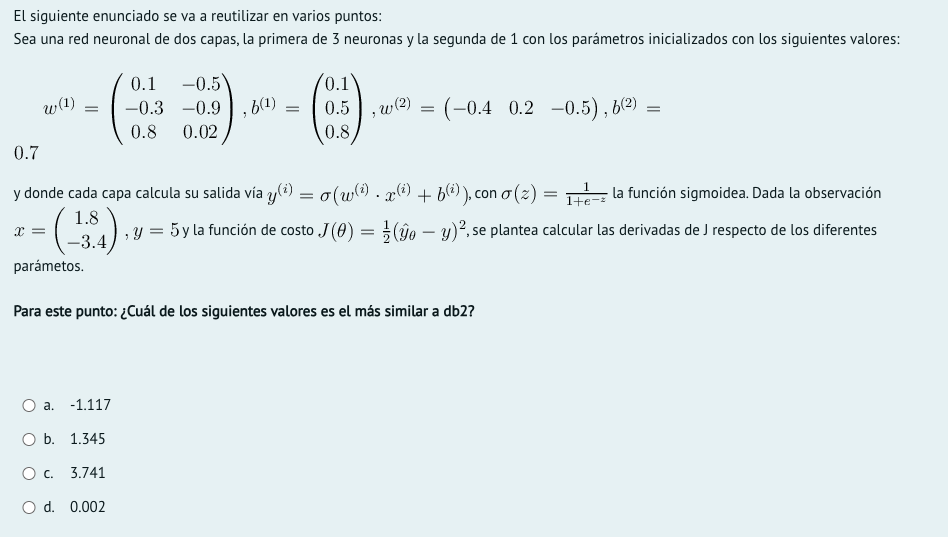

In [1]:
import numpy as np

def calcular_db2_parametrizable(W1, b1, W2, b2, x, y):
    """
    Calcula el valor de db2 en una red neuronal de 2 capas (1 oculta + salida)
    usando función de activación sigmoide y MSE.

    Args:
        W1 (np.array): matriz de pesos de la capa 1 (shape: [n_hidden, n_input])
        b1 (np.array): bias de la capa 1 (shape: [n_hidden, 1])
        W2 (np.array): pesos de la capa de salida (shape: [1, n_hidden])
        b2 (float): bias de la capa de salida
        x (np.array): entrada (shape: [n_input, 1])
        y (float): valor verdadero (escala)

    Returns:
        float: derivada del costo respecto a b2
    """
    sigmoid = lambda z: 1 / (1 + np.exp(-z))

    # Forward pass
    z1 = np.dot(W1, x) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = sigmoid(z2)

    db2 = a2 - y
    return float(db2)

In [2]:
# Probamos con los valores del ejercicio original
W1 = np.array([[0.1, -0.5],
               [-0.3, -0.9],
               [0.8,  0.02]])
b1 = np.array([[0.1], [0.5], [0.8]])
W2 = np.array([[-0.4, 0.2, -0.5]])
b2 = 0.7
x = np.array([[1.8], [-3.4]])
y = 5

calcular_db2_parametrizable(W1, b1, W2, b2, x, y)

/var/folders/6c/17qbm4nd5318hd4bcrx68wjh0000gn/T/ipykernel_89493/3177561873.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(db2)


-4.477423348400042

#### Pregunta 7

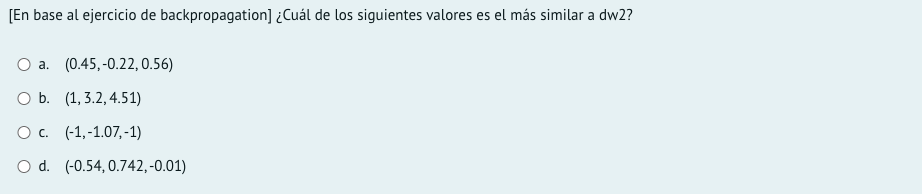

In [3]:
def calcular_dw2_parametrizable(W1, b1, W2, b2, x, y):
    """
    Calcula el gradiente respecto a los pesos de la capa de salida (dw2).

    Returns:
        np.array: gradiente dw2 (shape: igual a W2)
    """
    sigmoid = lambda z: 1 / (1 + np.exp(-z))

    # Forward pass
    z1 = np.dot(W1, x) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = sigmoid(z2)

    # Backprop: derivada del costo respecto a z2
    dz2 = a2 - y

    # Derivada del costo respecto a W2
    dw2 = dz2 * a1.T  # (1,1) * (1,3) -> (1,3)
    return dw2.flatten()

In [4]:
calcular_dw2_parametrizable(W1, b1, W2, b2, x, y)

array([-3.93422755, -4.26908672, -4.01941326])

## Pregunta 8

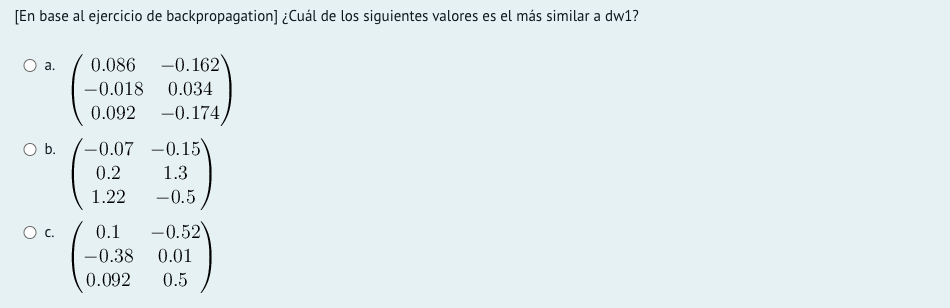

In [6]:
def calcular_dw1(W1, b1, W2, b2, x, y):
    """
    Calcula el gradiente respecto a los pesos de la primera capa (dw1).
    """
    sigmoid = lambda z: 1 / (1 + np.exp(-z))
    sigmoid_deriv = lambda z: sigmoid(z) * (1 - sigmoid(z))

    # Forward pass
    z1 = np.dot(W1, x) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = sigmoid(z2)

    # Backprop
    dz2 = a2 - y                      # (1,1)
    da1 = W2.T @ dz2                 # (3,1)
    dz1 = da1 * sigmoid_deriv(z1)    # (3,1)
    dw1 = dz1 @ x.T                  # (3,2)

    return dw1

In [7]:
calcular_dw1(W1, b1, W2, b2, x, y)

array([[ 0.34365306, -0.64912244],
       [-0.07151135,  0.13507699],
       [ 0.37004288, -0.69896989]])